## INTRODUCTION
## Problem Statement
Birth weight is a critical indicator of newborn health and future developmental outcomes. Low birth weight (LBW) is linked to increased risks of infant mortality, chronic health conditions, and developmental challenges. Healthcare providers, public health agencies, and policymakers require data-driven insights to identify risk factors and implement effective interventions for improving neonatal health outcomes.

Project Goal
This project seeks to:

Analyze correlations between prenatal care, maternal health, and birth outcomes.

Provide evidence-based recommendations for reducing LBW incidence and enhancing neonatal care.

Key Questions
What maternal factors (e.g., age, BMI, health conditions) most strongly correlate with birth weight?

Are there patterns in birth weight related to prenatal care quality,lifestyle habits(smoking)

What interventions (e.g., nutritional programs, healthcare policies) show the greatest potential for improving birth weight?

Target Audience
Healthcare providers (OB-GYNs, midwives, pediatricians)

Public health departments and policymakers

Researchers in maternal and child health

Health insurance providers and community health organizations

# 2. Data Understanding
We'll now systematically explore each dataset to understand:

Structure (columns and data types)

- Sample data (via .head())

- Missing values

- Duplicates

- Basic statistics (via .describe())

In [305]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## LOAD DATA SET

In [306]:
df = pd.read_csv("Dataset/babies.csv")
df.head

<bound method NDFrame.head of       case  bwt  gestation  parity   age  height  weight  smoke
0        1  120      284.0       0  27.0    62.0   100.0    0.0
1        2  113      282.0       0  33.0    64.0   135.0    0.0
2        3  128      279.0       0  28.0    64.0   115.0    1.0
3        4  123        NaN       0  36.0    69.0   190.0    0.0
4        5  108      282.0       0  23.0    67.0   125.0    1.0
...    ...  ...        ...     ...   ...     ...     ...    ...
1231  1232  113      275.0       1  27.0    60.0   100.0    0.0
1232  1233  128      265.0       0  24.0    67.0   120.0    0.0
1233  1234  130      291.0       0  30.0    65.0   150.0    1.0
1234  1235  125      281.0       1  21.0    65.0   110.0    0.0
1235  1236  117      297.0       0  38.0    65.0   129.0    0.0

[1236 rows x 8 columns]>


# 3. EXPLORATORY DATA ANALYSIS

In this section we aim to understand the overall structure of the `Dataset/babies.csv` by examining the dataset and  summarizing its main characteristics using statistics and visualizations.

**Steps to achieve this:**

- Understand the structure and content of the data

- Identify missing or inconsistent values

- Explore relationships between features

- Generate insights that can guide further analysis or modeling


### Step 1: Overview of Columns and Data types

This helps us understand which columns are numerical, categorical, and where missing values exist.

In [307]:
# Column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


### Step 2: Check for missing Data

In [308]:
df.isnull().sum().sort_values(ascending=False)

weight       36
height       22
gestation    13
smoke        10
age           2
case          0
bwt           0
parity        0
dtype: int64

### Step 3: Fill missing values in columns

Some columns have missing values and we will  the missing values in the specified columns with their respective means.

In [309]:
# Calculate means for columns with missing values
means = df[['gestation', 'age', 'height', 'weight', 'smoke']].mean()

# Fill missing values using pre-calculated means
df.fillna(means, inplace=True)

### Step 4: Correlation Heatmap
Let’s check how numerical features relate to each other

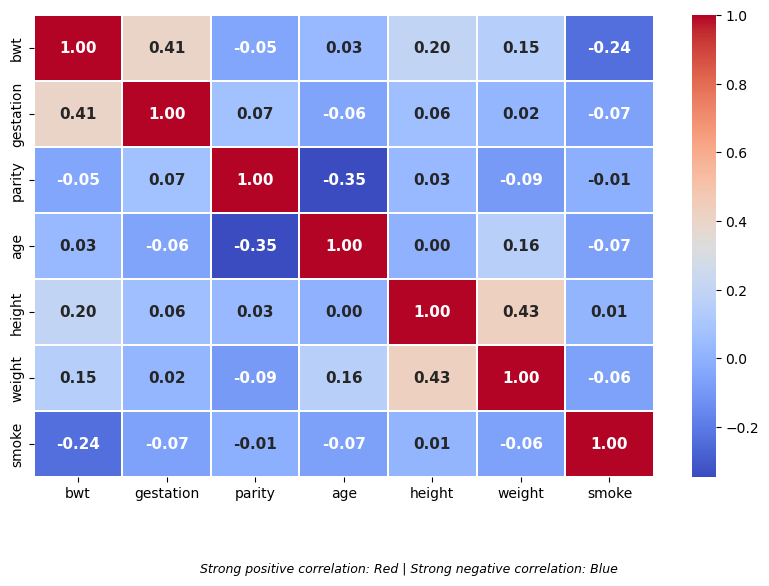

In [310]:
# Create numeric DataFrame and drop identifier column
numeric_df = df.select_dtypes(include='number').drop(columns='case')

# Plot correlation heatmap with enhanced readability
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.3,
    annot_kws={"size": 11, "weight": "bold"}
)
plt.figtext(0.5, -0.05, 
            "Strong positive correlation: Red | Strong negative correlation: Blue",
            ha="center", fontsize=9, style="italic")

plt.show()

### Correlation Heatmap Interpretation
The heatmap shows correlations between birth weight (bwt) and factors like gestation period, maternal age, height, weight, parity, and smoking status. Key takeaways:

- Birth weight is positively correlated with gestation (0.41)—longer pregnancies tend to yield heavier babies.

- Smoking shows a negative correlation with birth weight (-0.24)—suggesting smoking may lower birth weight.

- Other variables have weaker correlations, though maternal height and weight show mild positive effects.

In essence, longer gestation and not smoking are most strongly linked to healthier birth weights.


### Visual Analysis by categorical factors

This step provides a clear visual analysis of how birth weight varies by key categorical factors

In [311]:
# Convert key variables to categorical types for proper grouping
df['smoke'] = df['smoke'].apply(lambda x: 'Smoker' if x >= 0.5 else 'Non-smoker')
df['parity_group'] = df['parity'].apply(lambda x: 'First pregnancy' if x == 0 else 'Previous pregnancies')

### Maternal Age Distribution

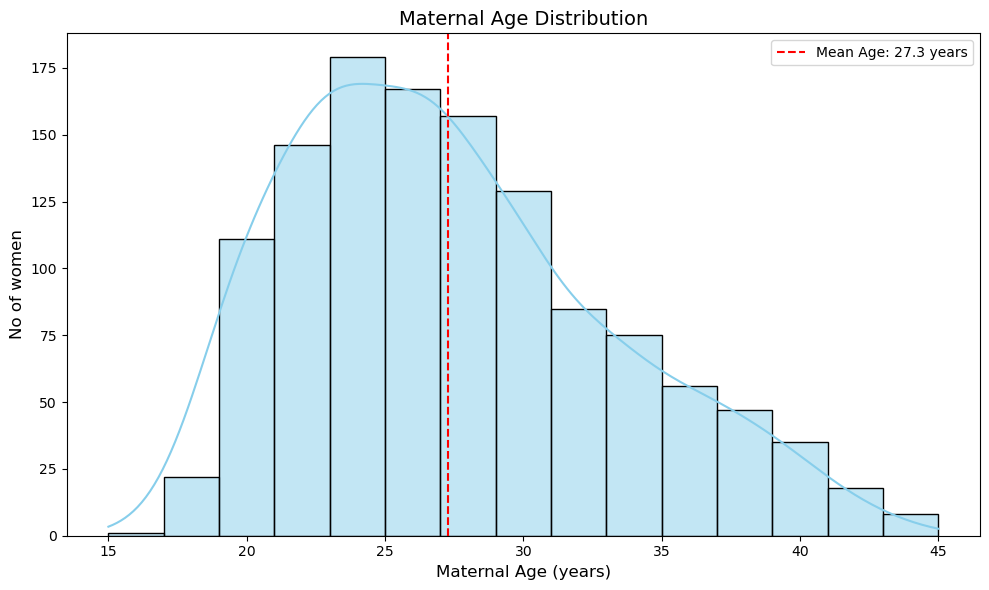

In [312]:
#maternal age distribution
plt.figure(figsize=(10, 6))  

sns.histplot(df['age'], bins=15, color='skyblue', kde=True)
plt.title('Maternal Age Distribution', fontsize=14)
plt.xlabel('Maternal Age (years)', fontsize=12)
plt.ylabel('No of women', fontsize=12)

# Add mean line for reference
mean_age = df['age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', 
            label=f'Mean Age: {mean_age:.1f} years')
plt.legend()

plt.tight_layout()
plt.show()

Childbirth is most common among women in their 20s, tapering off on either side of that age group.- The mean age is 27.3 years, marked by the red dashed line


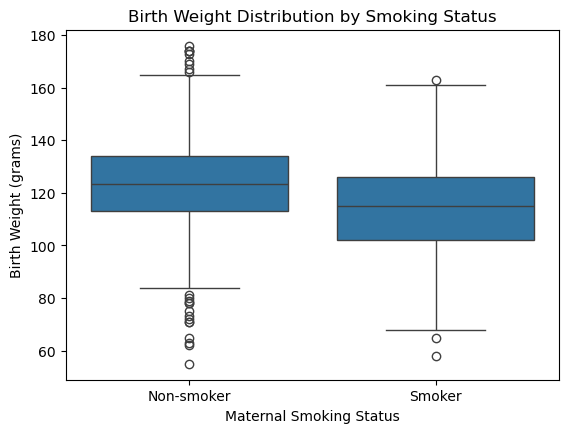

In [313]:
# Set up the figure
plt.figure(figsize=(14, 10))

# Plot 1: Birth weight distribution by smoking status
plt.subplot(2, 2, 1)
sns.boxplot(x='smoke', y='bwt', data=df,)
plt.title('Birth Weight Distribution by Smoking Status')
plt.xlabel('Maternal Smoking Status')
plt.ylabel('Birth Weight (grams)')
plt.show()


The box plot compares infant birth weights between non-smokers and smokers. It shows that babies born to smokers tend to have slightly lower median birth weights and a wider spread of values, with some notably low outliers. This supports the idea that maternal smoking is associated with reduced and more variable birth weights.




### Birth weight Distribution By Pregnancy History

Text(0, 0.5, 'Birth Weight (grams)')

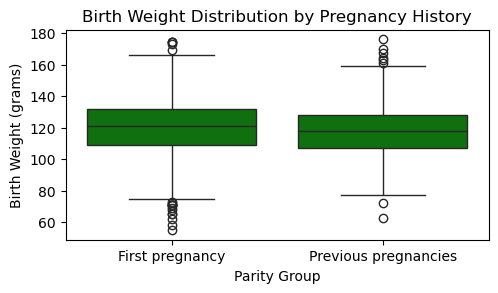

In [314]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='parity_group', y='bwt', color='green')
plt.title('Birth Weight Distribution by Pregnancy History', fontsize=12)
plt.xlabel('Parity Group', fontsize=10)
plt.ylabel('Birth Weight (grams)', fontsize=10)

This box plot compares birth weights based on maternal parity—specifically, first-time pregnancies versus mothers with previous pregnancies:

- Median birth weight is similar for both groups, centered around 120 grams, suggesting parity may not drastically impact the central tendency.

- Spread of birth weights (IQR) is also comparable, indicating consistent variability in both groups.

- Outliers are visible in both categories: some infants born to both first-time and experienced mothers fall below ~80g or exceed ~160g, hinting at individual-level variation not explained by parity alone.

Conclusion: Parity alone doesn't show a strong influence on average birth weight or variability, though outliers suggest other interacting factors may be at play. If you're evaluating predictors of birth weight, this suggests parity might be a weaker standalone variable.


### Gestation vs. Birth Weight Split By Maternal Smoking Status:

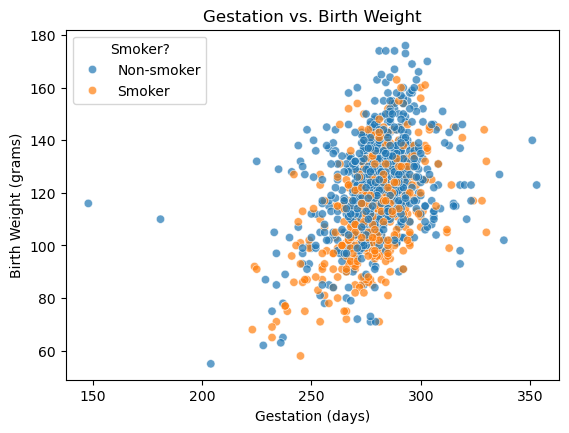

In [315]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
sns.scatterplot(df, x='gestation', y='bwt', hue='smoke', alpha=0.7)
plt.title('Gestation vs. Birth Weight')
plt.xlabel('Gestation (days)')
plt.ylabel('Birth Weight (grams)')
plt.legend(title='Smoker?')
plt.show()

We can understand several things from this scatter plot of gestation vs. birth weight split by maternal smoking status:
- Longer gestation correlates with higher birth weight for both smokers and non-smokers.
- Non-smokers (blue dots) generally have babies with higher birth weights than smokers (orange dots) across gestation periods.
- There's greater variability among smokers, with more low birth weight cases even at moderate gestation lengths.
This reinforces the finding that smoking during pregnancy may impair fetal growth, independent of how long the pregnancy lasts.
